In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import itertools

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Новая таблица.xlsx to Новая таблица (1).xlsx


In [ ]:
gdp = pd.read_excel('Новая таблица.xlsx')

In [ ]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   84 non-null     datetime64[ns]
 1   GDP     84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [ ]:
gdp.head()

,Month,GDP
0,2017-01-01,7.9
1,2017-02-01,7.0
2,2017-03-01,7.8
3,2017-04-01,8.4
4,2017-05-01,8.2


In [ ]:
gdp = gdp.set_index('Month')

<Axes: xlabel='Month'>

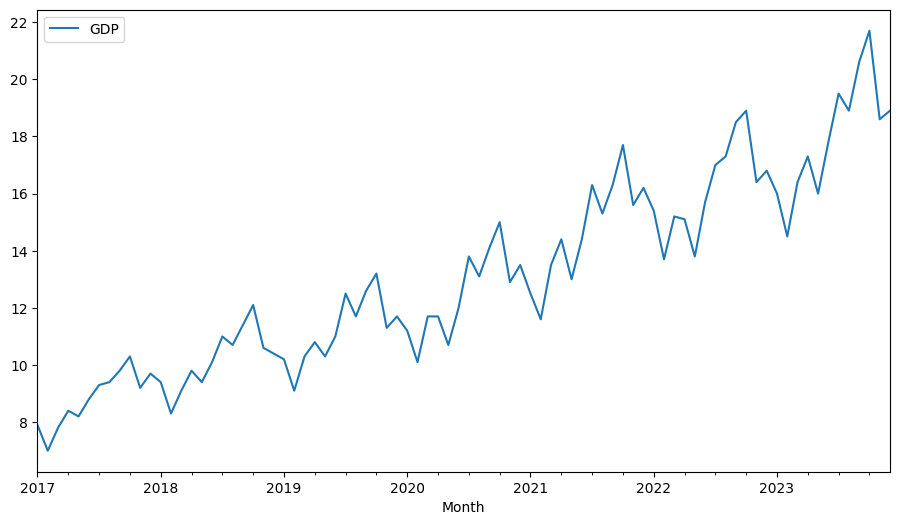

In [ ]:
gdp.plot(figsize=(11, 6))

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(gdp,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:670.5659269319525
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:518.9745651055125
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:275.60325118600224
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:210.49896820458497
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:136.44999795494155
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:97.64120346418059
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:177.13230778726296
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:141.8897456486808
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:559.4660191059124
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:424.5049815969786
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:200.1655975107642
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:156.61477162389968
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:99.96490661629917
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:100.77914161256518
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:140.4414615882994
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:110.4205399082584
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:260.2498813931133
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:186.0376442297806
ARIM

ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:61.49630871713913

In [ ]:
mod = sm.tsa.statespace.SARIMAX(gdp,
order=(1, 0, 0),
seasonal_order=(1, 0, 1, 12),
enforce_stationarity=False,
enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6490      0.086      7.509      0.000       0.480       0.818
ar.S.L12       1.1250      0.004    312.290      0.000       1.118       1.132
ma.S.L12      -1.0009     55.599     -0.018      0.986    -109.972     107.970
sigma2         0.0896      4.985      0.018      0.986      -9.681       9.861


In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()

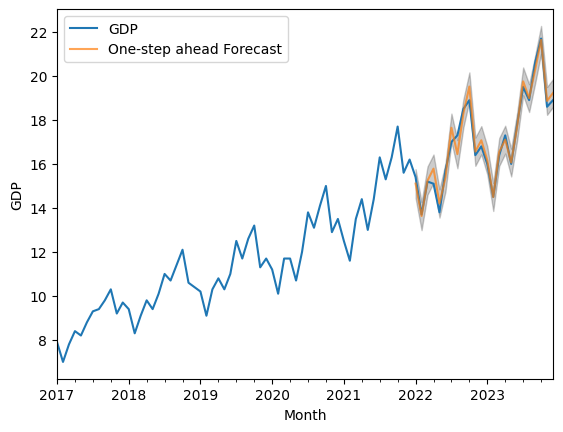

In [ ]:
ax = gdp.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Month')
ax.set_ylabel('GDP')
plt.legend()
plt.show()

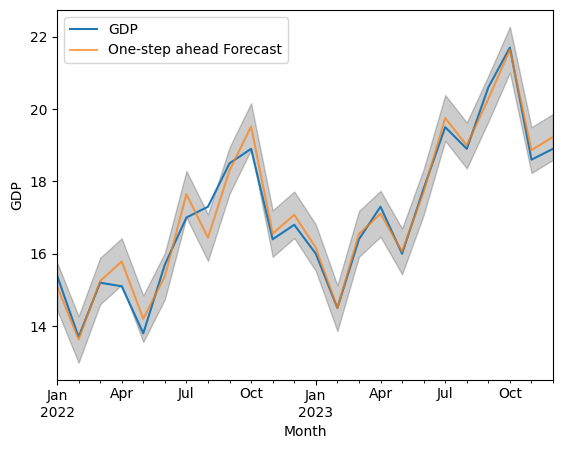

In [ ]:
ax = gdp['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Month')
ax.set_ylabel('GDP')
plt.legend()
plt.show()

In [ ]:
gdp_forecasted = pred.predicted_mean
gdp_truth = gdp['2022-01-01':] # Compute the mean square error


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(gdp_forecasted, gdp_truth)
mae

0.2732330894269719

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(gdp_forecasted, gdp_truth)
mse

0.12319783422063683

In [ ]:
from math import sqrt
rmse = sqrt(mse)
rmse

0.35099549031381705

In [ ]:
# Получить прогноз на N шагов вперёд
pred_uc = results.get_forecast(steps=24)
# Получить интервал прогноза
pred_ci = pred_uc.conf_int()

In [ ]:
ax = gdp.plot(label='observed', figsize=(10, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('GDP')
plt.legend()
plt.show()

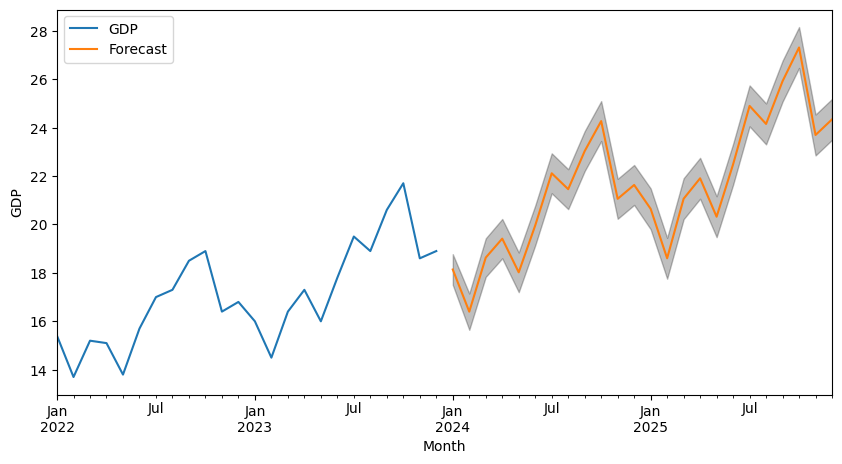

In [ ]:
ax = gdp['2022':].plot(label='observed', figsize=(10, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('GDP')
plt.legend()
plt.show()

In [ ]:
pred_uc.predicted_mean

2024-01-01    18.138485
2024-02-01    16.398247
2024-03-01    18.630783
2024-04-01    19.412716
2024-05-01    18.022508
2024-06-01    19.957965
2024-07-01    22.111136
2024-08-01    21.455203
2024-09-01    23.027450
2024-10-01    24.266022
2024-11-01    21.056909
2024-12-01    21.629544
2025-01-01    20.644121
2025-02-01    18.602793
2025-03-01    21.060241
2025-04-01    21.904758
2025-05-01    20.317915
2025-06-01    22.480533
2025-07-01    24.893284
2025-08-01    24.149106
2025-09-01    25.913869
2025-10-01    27.304663
2025-11-01    23.692635
2025-12-01    24.335755
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
pred_ci

,lower GDP,upper GDP
2024-01-01,17.504417,18.772553
2024-02-01,15.647809,17.148685
2024-03-01,17.836421,19.425144
2024-04-01,18.600567,20.224866
2024-05-01,17.202982,18.842033
2024-06-01,19.135353,20.780576
2024-07-01,21.287228,22.935044
2024-08-01,20.630749,22.279656
2024-09-01,22.202767,23.852133
2024-10-01,23.441243,25.090802
